In [ ]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv("/content/_annotation.csv")

# Ensure 'filename' column is string and drop NaNs
df = df.dropna(subset=["filename"])  # Remove rows where 'filename' is NaN
df["filename"] = df["filename"].astype(str)  # Ensure filenames are strings

# Remove rows where the filename starts with "WechatIMG"
df = df[~df["filename"].str.startswith("WechatIMG")]

# Function to process filenames
def process_filename(filename):
    match = re.match(r"^(\d+)_", filename)  # Match numbers before '_'
    if match:
        return match.group(1) + ".jpg"
    return filename  # Keep unchanged if already valid

# Apply the transformation
df["filename"] = df["filename"].apply(process_filename)

# Save the processed file
df.to_csv("/content/processed_annotation.csv", index=False)

print("Preprocessing complete. Saved as 'processed_annotation.csv'.")


Preprocessing complete. Saved as 'processed_annotation.csv'.


In [ ]:
pip install Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.2 MB/s eta 0:00:00


In [ ]:
# TensorFlow
# !pip install python-doctr[tf,viz]

# PyTorch
# First we have to uninstall the preinstalled tensorflow version if we want to work with PyTorch as backend
# because the env variables USE_TORCH=1 / USE_TF=1 doesn't have an effect in Colab
!pip uninstall -y tensorflow
!pip install python-doctr[torch,viz]

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,388 kB of archives.
After this operation, 6,653 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-freefont-ttf all 20120503-10build1 [2,388 kB]
Fetched 2,388 kB in 1s (2,971 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-freefont-ttf.
(Reading databa

In [ ]:
from doctr.models import ocr_predictor

model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

  0%|          | 0/102021912 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [ ]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

  0%|          | 0/65814772 [00:00<?, ?it/s]

In [ ]:
import cv2
import numpy as np
from doctr.models import ocr_predictor

# Load OCR Model
predictor = ocr_predictor(pretrained=True)

# Load image using OpenCV
image_path = '/content/91.jpg'
img = cv2.imread(image_path)

# Check if image is correctly loaded
if img is None:
    raise FileNotFoundError(f"Error: Could not load image at {image_path}")

# Convert image from BGR (OpenCV format) to RGB (Required by doctr)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Doctr expects a list of images, so wrap it in a list
result = predictor([img])  # Pass a list of images

# Print extracted text
print(result.export())  # Convert result to readable format


{'pages': [{'page_idx': 0, 'dimensions': (1279, 1507), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((np.float64(0.1416015625), np.float64(0.5885999499120407)), (np.float64(0.880859375), np.float64(0.9326439112587959))), 'objectness_score': 0.6598837318874541, 'lines': [{'geometry': ((np.float64(0.333984375), np.float64(0.6047090317142298)), (np.float64(0.3974609375), np.float64(0.635776546618452))), 'objectness_score': 0.7655397653579712, 'words': [{'value': 'EST', 'confidence': 0.4299887716770172, 'geometry': ((np.float64(0.333984375), np.float64(0.6047090317142298)), (np.float64(0.3974609375), np.float64(0.635776546618452))), 'objectness_score': 0.7655397653579712, 'crop_orientation': {'value': 0, 'confidence': None}}]}, {'geometry': ((np.float64(0.4814453125), np.float64(0.6001064369136044)), (np.float64(0.5517578125), np.float64(0.6323246005179828))), 'objectness_score': 0.7860877513885498, 'words': [{

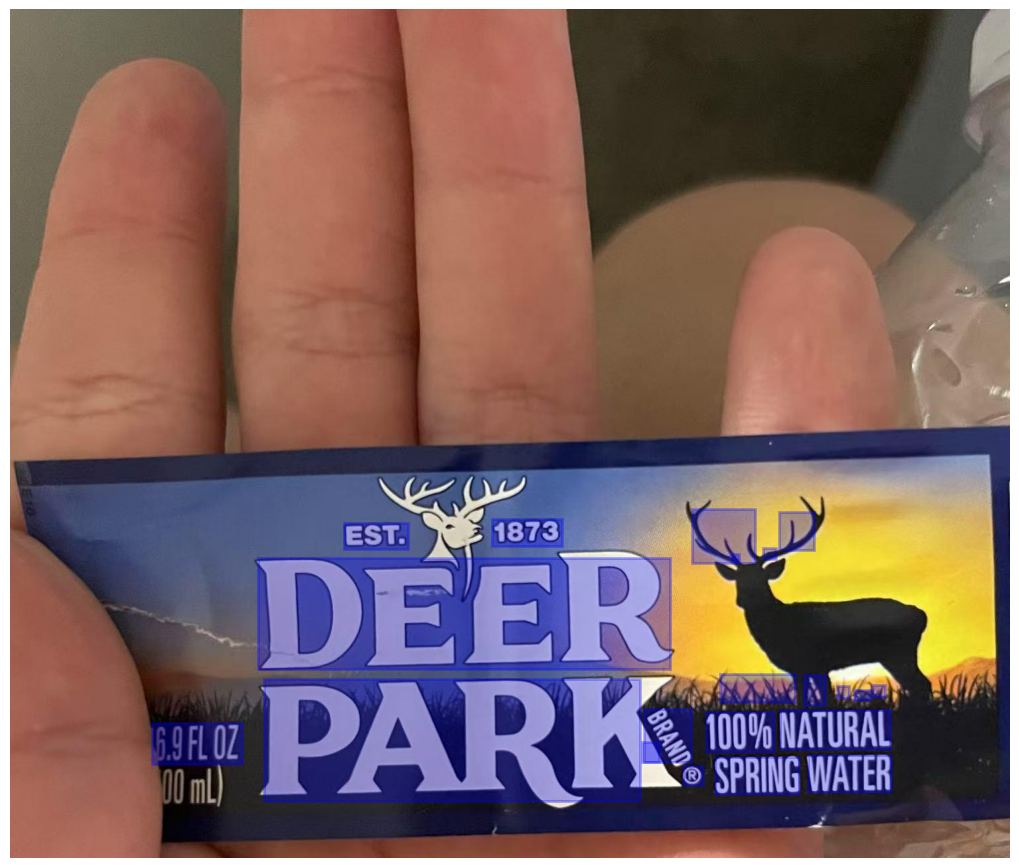

EST
1873
V
- -
-
DEER
XXAW A V. & V
G.9FLOZ
100% NATURAL
-
E
@ SPRING WATER
PARK


In [ ]:
result.show()
string_result = result.render()
print(string_result)

In [ ]:
import os
import shutil

# Define source and destination folders
source_dir = "/content/"
destination_dir = "/all_jpgs"

# Create destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move all .jpg files to the new folder
jpg_files = [f for f in os.listdir(source_dir) if f.endswith(".jpg")]

for file in jpg_files:
    shutil.move(os.path.join(source_dir, file), os.path.join(destination_dir, file))

print(f"Moved {len(jpg_files)} JPG files to {destination_dir}")


Moved 125 JPG files to /all_jpgs


In [ ]:
import shutil
if os.path.isdir("doctr_results.csv"):
    shutil.rmtree("doctr_results.csv")
print("Fixed: Removed the directory named 'doctr_results.csv'")


Fixed: Removed the directory named 'doctr_results.csv'


In [ ]:
import os
import pandas as pd
import numpy as np
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

# Load OCR model
model = ocr_predictor(pretrained=True)

# Define input directory and output file
image_dir = "/all_jpgs"
output_file = "doctr_results.csv"

# Prepare storage for results
results = []

for img_name in os.listdir(image_dir):
    if img_name.endswith(".jpg"):
        # Load image
        img_path = os.path.join(image_dir, img_name)
        doc = DocumentFile.from_images(img_path)
        preds = model(doc)

        # Extract doctr results
        for page in preds.pages:
            for block in page.blocks:
                for line in block.lines:
                    for word in line.words:
                        xmin, ymin = word.geometry[0]
                        xmax, ymax = word.geometry[1]
                        width = xmax - xmin
                        height = ymax - ymin
                        text = word.value
                        results.append([img_name, xmin, xmax, ymin, ymax, width, height, text])




In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['filename', 'xmin', 'xmax', 'ymin', 'ymax', 'width', 'height', 'class'])

# Save to CSV
results_df.to_csv(output_file, index=False)

print(f"Results saved to {output_file}")

Results saved to doctr_results.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files
file1_path = "/mnt/data/ocr_benchmark_results (gpt).csv"
file2_path = "/mnt/data/ocr_benchmark_results (handlabel).csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Ensure necessary columns exist
required_columns = {'file_name', 'WER', 'CER', 'LEV'}
if not required_columns.issubset(df1.columns) or not required_columns.issubset(df2.columns):
    raise ValueError("One or both CSV files are missing required columns: 'file_name', 'WER', 'CER', 'LEV'")

# Compute average WER, CER, LEV for both datasets
averages1 = df1[['WER', 'CER', 'LEV']].mean()
averages2 = df2[['WER', 'CER', 'LEV']].mean()

# Identify files with highest and lowest error for each dataset
highest_error_file1 = df1.loc[df1['WER'].idxmax(), 'file_name']
lowest_error_file1 = df1.loc[df1['WER'].idxmin(), 'file_name']
highest_error_file2 = df2.loc[df2['WER'].idxmax(), 'file_name']
lowest_error_file2 = df2.loc[df2['WER'].idxmin(), 'file_name']

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['WER', 'CER', 'LEV']

for i, metric in enumerate(metrics):
    axes[i].hist([df1[metric], df2[metric]], bins=20, label=['GPT', 'Handlabel'], alpha=0.7)
    axes[i].set_title(f'{metric} Distribution')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print results
print("Average WER, CER, LEV for GPT:")
print(averages1)
print("\nAverage WER, CER, LEV for Handlabel:")
print(averages2)

print(f"\nGPT - Highest Error File: {highest_error_file1}, Lowest Error File: {lowest_error_file1}")
print(f"Handlabel - Highest Error File: {highest_error_file2}, Lowest Error File: {lowest_error_file2}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Preprocessed data saved to preprocessed_data.csv
Benchmark results saved to ocr_benchmark_results.csv


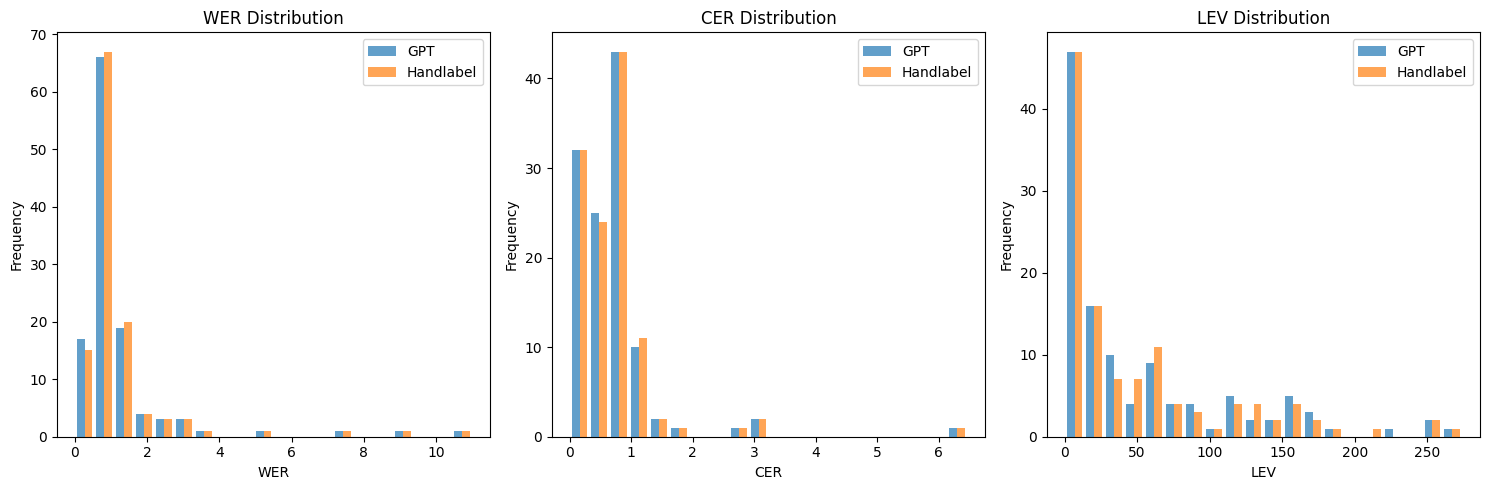

Average WER, CER, LEV for GPT:
WER     1.298604
CER     0.707222
LEV    51.777778
dtype: float64

Average WER, CER, LEV for Handlabel:
WER     1.303584
CER     0.711466
LEV    51.102564
dtype: float64

GPT - Highest Error File: 41.jpg, Lowest Error File: 101.jpg
Handlabel - Highest Error File: 41.jpg, Lowest Error File: 101.jpg


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files
file1_path = "/ocr_benchmark_results (gpt).csv"
file2_path = "/ocr_benchmark_results (handlabel).csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Ensure necessary columns exist
required_columns = {'filename', 'WER', 'CER', 'LEV'}
if not required_columns.issubset(df1.columns) or not required_columns.issubset(df2.columns):
    raise ValueError("One or both CSV files are missing required columns: 'file_name', 'WER', 'CER', 'LEV'")

# Compute average WER, CER, LEV for both datasets
averages1 = df1[['WER', 'CER', 'LEV']].mean()
averages2 = df2[['WER', 'CER', 'LEV']].mean()

# Identify files with highest and lowest error for each dataset
highest_error_file1 = df1.loc[df1['WER'].idxmax(), 'filename']
lowest_error_file1 = df1.loc[df1['WER'].idxmin(), 'filename']
highest_error_file2 = df2.loc[df2['WER'].idxmax(), 'filename']
lowest_error_file2 = df2.loc[df2['WER'].idxmin(), 'filename']

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['WER', 'CER', 'LEV']

for i, metric in enumerate(metrics):
    axes[i].hist([df1[metric], df2[metric]], bins=20, label=['GPT', 'Handlabel'], alpha=0.7)
    axes[i].set_title(f'{metric} Distribution')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print results
print("Average WER, CER, LEV for GPT:")
print(averages1)
print("\nAverage WER, CER, LEV for Handlabel:")
print(averages2)

print(f"\nGPT - Highest Error File: {highest_error_file1}, Lowest Error File: {lowest_error_file1}")
print(f"Handlabel - Highest Error File: {highest_error_file2}, Lowest Error File: {lowest_error_file2}")
